# Test of hypothesis for the 2021 customer yield data

In [1]:
source('../load_environment.R')
options(repr.plot.width=6, repr.plot.height=4)

Pivot Bio, Inc.
This code performs analyses supporting findings of the paper entitled:
"Genetic remodeling of soil diazotrophs enables partial replacement of synthetic nitrogen fertilizer with biological nitrogen fixation in maize".

##------ Thu Jun 06 10:07:27 2024 ------## 
Loaded packages:  tidyverse, readxl, broom, foreach, nlme, lme4, lmerTest, glmmTMB, car, DHARMa, caret, emmeans, multcomp, ggpubr, scales, png, ggthemes and their dependencies.
A complete list of packages used in the analysis is provided in the `packages_citations.txt` file.


### Load dataset

In [2]:
df1 <- read.csv("./datasets/on_farm_yield_anonymized.csv") %>% 
mutate_at("treatment",factor)

str(df1)

'data.frame':	116 obs. of  5 variables:
 $ trial_id_hash : chr  "e1d50655" "e1d50655" "19f4b5ff" "19f4b5ff" ...
 $ treatment     : Factor w/ 2 levels "BAU","PROVEN40_ReducedN": 1 2 1 2 1 2 1 2 1 2 ...
 $ point_count   : int  7067 7591 677 673 849 892 8038 7762 4054 5403 ...
 $ yieldmean_Mgha: num  14.2 14.6 14.6 14.4 15.1 ...
 $ yieldcv_pct   : num  15.36 12.64 5.78 6.52 8.39 ...


In [3]:
df1$trial_id_hash %>% unique() %>% length()

[1] 58

## Analysis of mean yield

In [4]:
leveneTest(yieldmean_Mgha ~ treatment, data=df1)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.03432155,0.8533537
,114,NA,NA


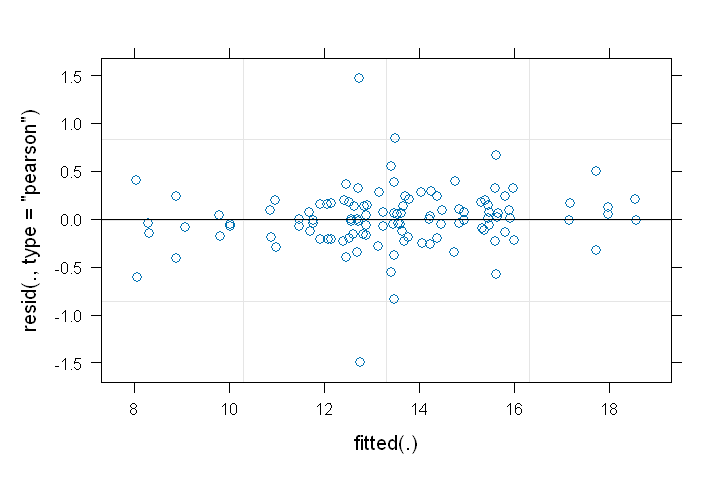

NULL



	Shapiro-Wilk normality test

data:  residuals(mod)
W = 0.89381, p-value = 1.42e-07


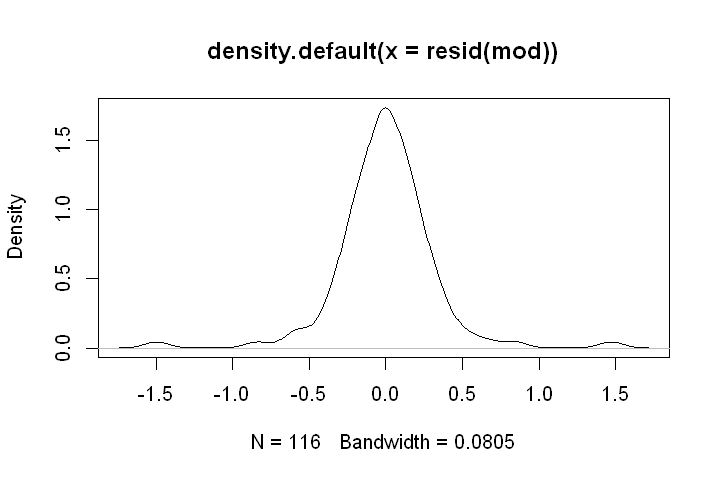

In [5]:
lme1 <- lmer(yieldmean_Mgha ~ treatment + (1|trial_id_hash), data=df1) 
check_assumptions(lme1)

In [6]:
anova(lme1)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
treatment,0.005309722,0.005309722,1,57,0.02652586,0.8711987


In [7]:
summary(lme1)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: yieldmean_Mgha ~ treatment + (1 | trial_id_hash)
   Data: df1

REML criterion at convergence: 374.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3484 -0.3512 -0.0095  0.3420  3.2908 

Random effects:
 Groups        Name        Variance Std.Dev.
 trial_id_hash (Intercept) 5.2241   2.2856  
 Residual                  0.2002   0.4474  
Number of obs: 116, groups:  trial_id_hash, 58

Fixed effects:
                           Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                13.43231    0.30581 59.14227  43.923   <2e-16 ***
treatmentPROVEN40_ReducedN -0.01353    0.08308 57.00000  -0.163    0.871    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
tPROVEN40_R -0.136

In [8]:
lme1_means <- emmeans(lme1, ~ treatment,  type = "response")
lme1_means

 treatment         emmean    SE   df lower.CL upper.CL
 BAU                 13.4 0.306 59.1     12.8       14
 PROVEN40_ReducedN   13.4 0.306 59.1     12.8       14

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

In [9]:
pairs(lme1_means) %>% 
data.frame()

,contrast,estimate,SE,df,t.ratio,p.value
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,BAU - PROVEN40_ReducedN,0.01353122,0.08308109,57,0.1628676,0.8711987


## Analysis of yield CV

In [10]:
leveneTest(yieldcv_pct ~ treatment, data=df1)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.1792556,0.6728115
,114,NA,NA


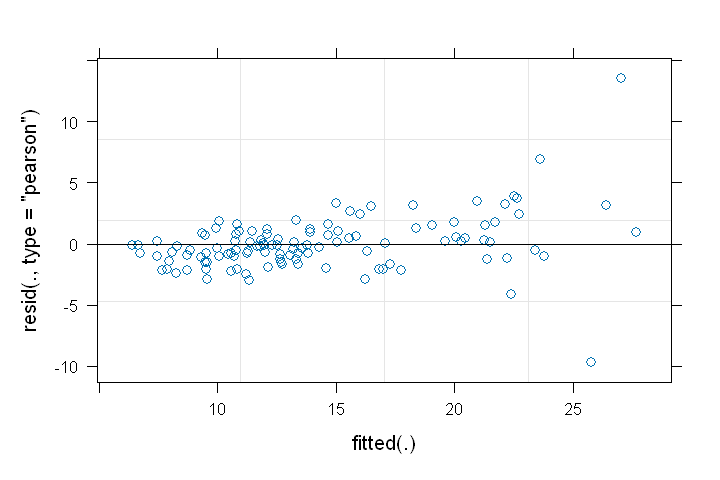

NULL



	Shapiro-Wilk normality test

data:  residuals(mod)
W = 0.83836, p-value = 6.27e-10


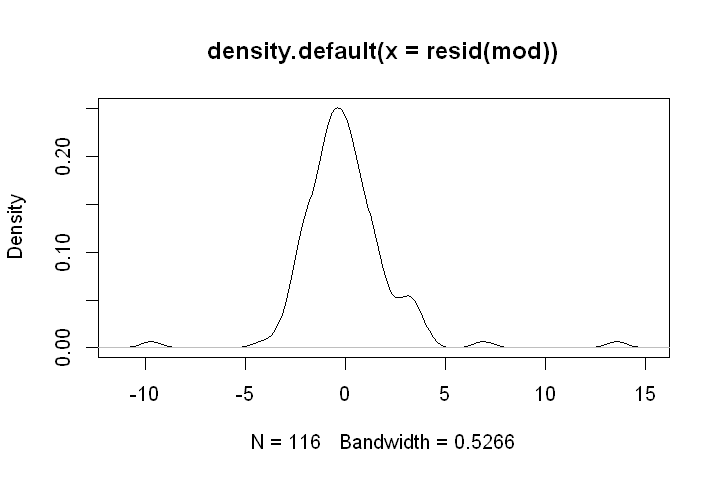

In [11]:
lme2 <- lmer(yieldcv_pct ~ treatment + (1|trial_id_hash), data=df1) 
check_assumptions(lme2)

In [12]:
leveneTest(log(yieldcv_pct) ~ treatment, data=df1)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,0.03820059,0.8453888
,114,NA,NA


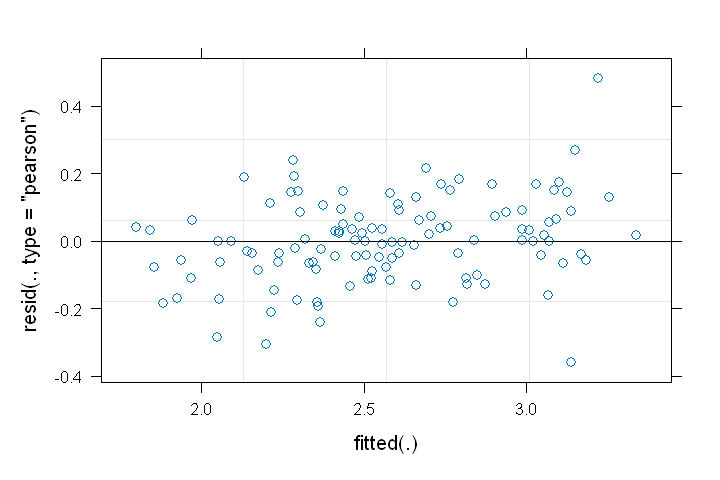

NULL



	Shapiro-Wilk normality test

data:  residuals(mod)
W = 0.98482, p-value = 0.2166


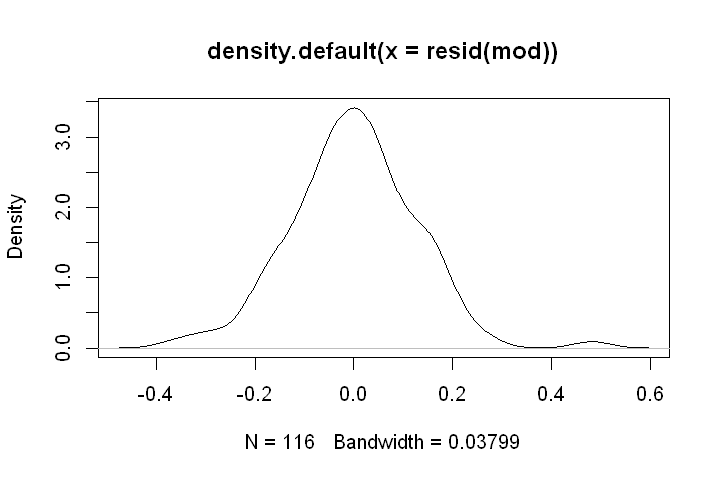

In [13]:
lme3 <- lmer(log(yieldcv_pct) ~ treatment + (1|trial_id_hash), data=df1) 
check_assumptions(lme3)

In [14]:
anova(lme3)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
treatment,0.196268,0.196268,1,57,6.585081,0.01293668


In [15]:
summary(lme3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log(yieldcv_pct) ~ treatment + (1 | trial_id_hash)
   Data: df1

REML criterion at convergence: 67.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0882 -0.4068 -0.0007  0.4409  2.7970 

Random effects:
 Groups        Name        Variance Std.Dev.
 trial_id_hash (Intercept) 0.1486   0.3855  
 Residual                  0.0298   0.1726  
Number of obs: 116, groups:  trial_id_hash, 58

Fixed effects:
                           Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                 2.61064    0.05546 67.30368  47.069   <2e-16 ***
treatmentPROVEN40_ReducedN -0.08227    0.03206 57.00000  -2.566   0.0129 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
tPROVEN40_R -0.289

In [16]:
lme3_means <- emmeans(lme3, ~ treatment,  type = "response")
lme3_means

 treatment         response    SE   df lower.CL upper.CL
 BAU                   13.6 0.755 67.3     12.2     15.2
 PROVEN40_ReducedN     12.5 0.695 67.3     11.2     14.0

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 
Intervals are back-transformed from the log scale 

In [17]:
pairs(lme3_means, reverse = TRUE) %>% data.frame()

,contrast,ratio,SE,df,null,t.ratio,p.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PROVEN40_ReducedN / BAU,0.921026,0.02952685,57,1,-2.566141,0.01293668


## Final table

In [18]:
table_out <- data.frame(lme1_means) %>% 
mutate(variable = "Yield Mean") %>% 
bind_rows(data.frame(lme3_means) %>% mutate(variable = "Yield CV", emmean = response)) %>%
transmute(variable,treatment,emmean = paste0(signif(emmean,4)," ±",signif(SE,3))) %>% 
left_join(bind_rows(
    pairs(lme1_means, reverse = TRUE) %>% data.frame() %>% mutate(variable = "Yield Mean", effect_size = estimate),
    pairs(lme3_means, reverse = TRUE) %>% data.frame() %>% mutate(variable = "Yield CV",  effect_size = ratio))) %>%
# Calculate MDE for alpha 0.05 and two tails
mutate(MDE = SE*qt(1 - 0.05/2, df)) %>% 
transmute(variable,treatment,emmean,contrast_type = contrast, effect_size =  paste0(signif(effect_size,3)," ±",signif(SE,2)), df, p.value = signif(p.value,3),
MDE = signif(MDE,3))


table_out

write_csv(table_out,"./figures/yield_maps.csv")

Joining with `by = join_by(variable)`


variable,treatment,emmean,contrast_type,effect_size,df,p.value,MDE
<chr>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Yield Mean,BAU,13.43 ±0.306,PROVEN40_ReducedN - BAU,-0.0135 ±0.083,57,0.8710,0.1660
Yield Mean,PROVEN40_ReducedN,13.42 ±0.306,PROVEN40_ReducedN - BAU,-0.0135 ±0.083,57,0.8710,0.1660
Yield CV,BAU,13.61 ±0.755,PROVEN40_ReducedN / BAU,0.921 ±0.03,57,0.0129,0.0591
Yield CV,PROVEN40_ReducedN,12.53 ±0.695,PROVEN40_ReducedN / BAU,0.921 ±0.03,57,0.0129,0.0591
